In [1]:
import sys
from pathlib import Path

# Go two levels up to reach project root
project_root = Path.cwd().parents[1]  # from subfolder/ to notebook_folder/ to project_root/
scripts_path = project_root / "scripts"

if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [2]:
from scripts.general_scripts.features_engineering import quicky_data, lag_features_indicators
from scripts.general_scripts.pipelines import price_model
from scripts.general_scripts.predict import future_price_prediction
from scripts.general_scripts.transformer import TimeSeriesTransformerMultiOutput
from scripts.general_scripts.helper import CustomizedLoss
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
scaler = StandardScaler()
model_type = TimeSeriesTransformerMultiOutput
criterion = CustomizedLoss()
n_lags = 5
n_forecast = 2
seasonal_periods = 261

Seasonality Strength: 0.07


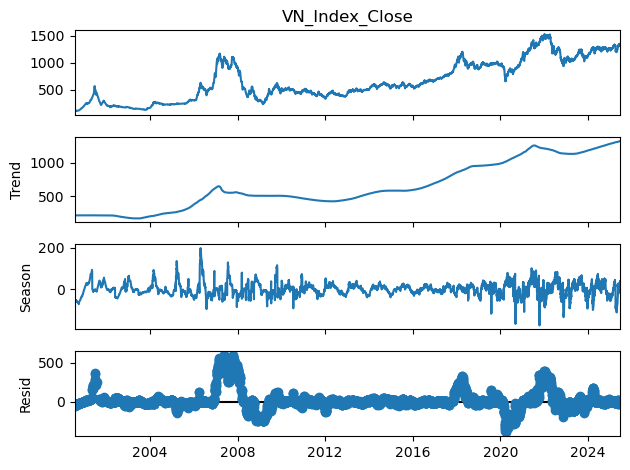

<Figure size 1200x400 with 0 Axes>

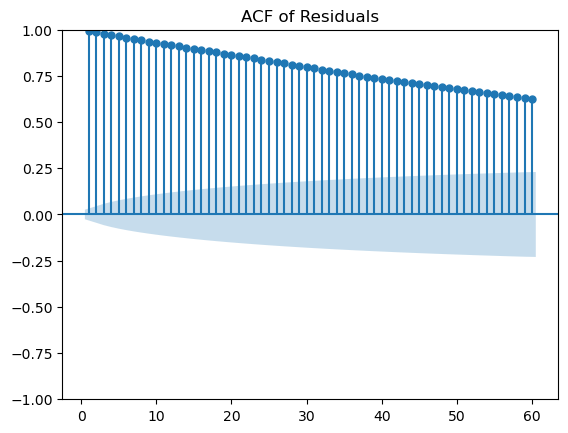

In [4]:
# 📂 Load dataset
file_path_1 = "../../ready_data/vn_index_data/cleaned_vn_index_data.csv"
df_1 = pd.read_csv(file_path_1)
df_1 = quicky_data(df_1, seasonal_periods, 'stl')

In [5]:
df_1.tail(20)

,VN_Index_Close,Total Volume,Total Value,trend,seasonal,residual,dow_sin,dow_cos,month_sin,month_cos
Date,,,,,,,,,,
2025-05-21,1323.05,1.065426e+09,2.524119e+13,1316.307633,-7.397195,14.139562,0.974928,-0.222521,0.866025,-0.500000
2025-05-22,1313.84,1.157120e+09,2.640522e+13,1316.693749,-20.053003,17.199253,0.433884,-0.900969,0.866025,-0.500000
2025-05-23,1314.46,7.177040e+08,1.689762e+13,1317.079848,-7.251491,4.631643,-0.433884,-0.900969,0.866025,-0.500000
2025-05-26,1332.51,1.028136e+09,2.317974e+13,1317.465929,3.459944,11.584127,0.000000,1.000000,0.866025,-0.500000
2025-05-27,1339.81,1.120862e+09,2.502798e+13,1317.851993,8.574197,13.383810,0.781831,0.623490,0.866025,-0.500000
2025-05-28,1341.87,9.644622e+08,2.241690e+13,1318.238038,12.061909,11.570054,0.974928,-0.222521,0.866025,-0.500000
2025-05-29,1341.86,9.264653e+08,2.097224e+13,1318.624065,12.941367,10.294568,0.433884,-0.900969,0.866025,-0.500000
2025-05-30,1332.60,9.846371e+08,2.232989e+13,1319.010073,14.733474,-1.143547,-0.433884,-0.900969,0.866025,-0.500000
2025-06-02,1336.30,9.632306e+08,2.084381e+13,1319.396062,20.929579,-4.025642,0.000000,1.000000,0.500000,-0.866025


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5694    1334.380581
dtype: float64
Hello


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5693    19.24102
dtype: float64
5693    1323.254876
dtype: float64
[DatetimeIndex(['2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-04'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-05'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-06'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-09'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-10'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-11'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-12'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-13'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-16'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-16 00:00:00
(5689, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.0673 - Val Loss: 0.0001
Test Loss: 0.0047
RMSE: 27.6510, MAE: 27.6510, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


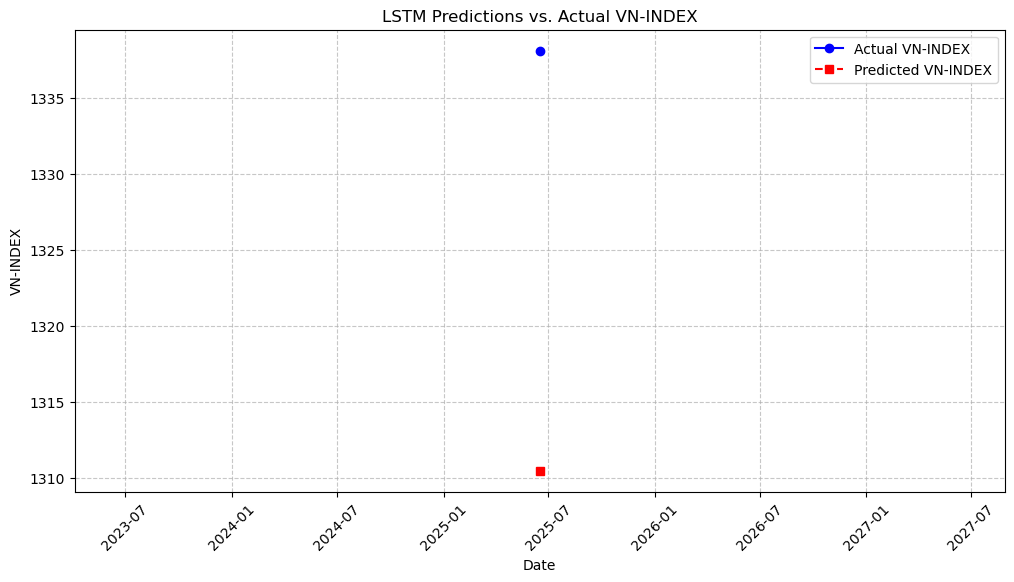

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-16      1338.110001         1310.459012
torch.Size([1, 1, 1])


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5694    1323.640641
dtype: float64
5694    1315.407893
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


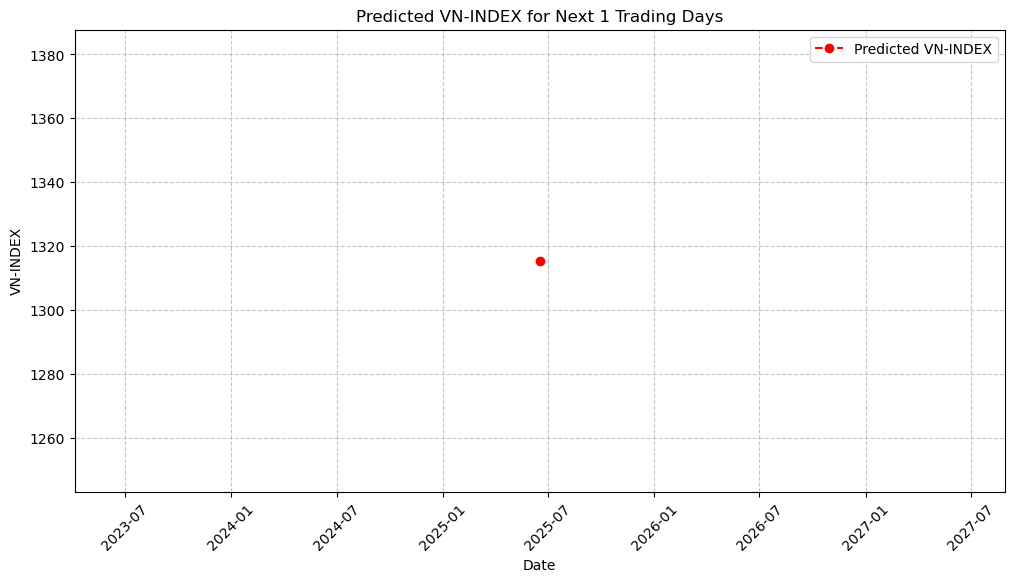

Date
2025-06-16    1338.11
dtype: float64


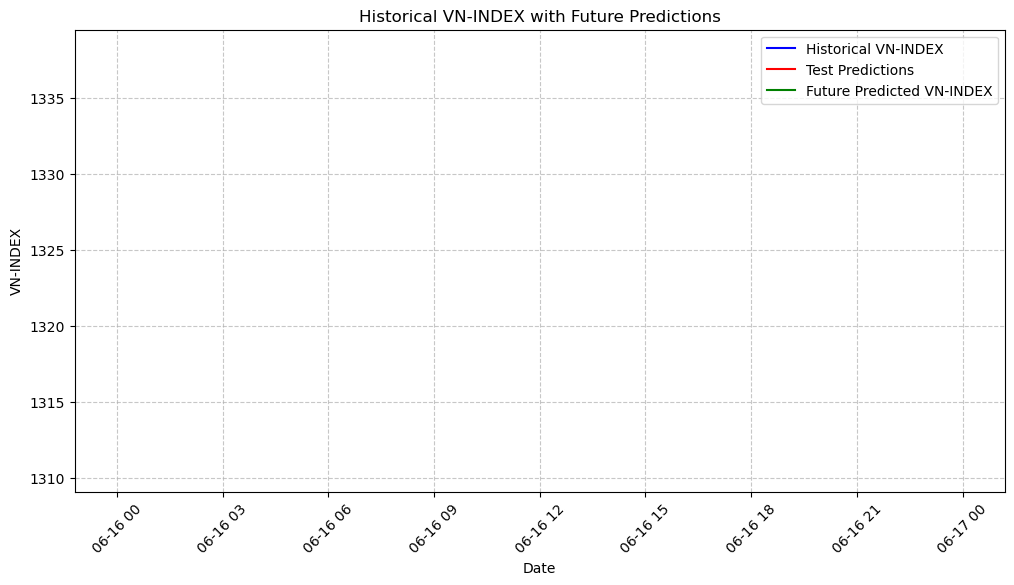

           Date  Predicted VN-INDEX
5694 2025-06-17         1315.407893


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5693    1315.244858
dtype: float64
Hello
5692    20.961141
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5692    1322.869091
dtype: float64
[DatetimeIndex(['2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-04'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-05'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-06'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-09'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-10'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-11'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-12'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-13'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-13 00:00:00
(5688, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.0680 - Val Loss: 0.0001
Test Loss: 0.0001
RMSE: 3.5046, MAE: 3.5046, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


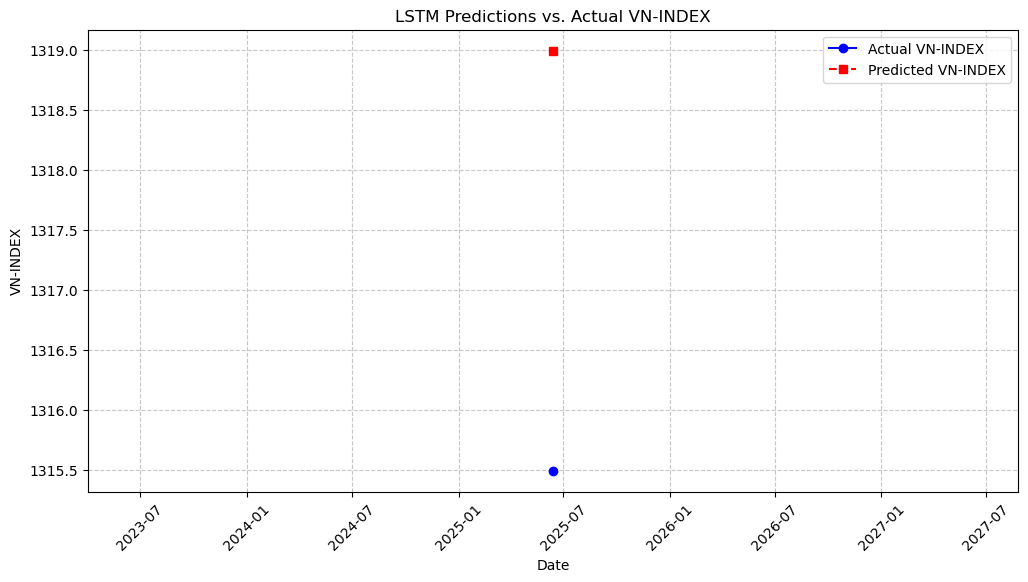

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-13      1315.489999         1318.994594
torch.Size([1, 1, 1])


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5693    1323.254876
dtype: float64
5693    1312.519087
dtype: float64


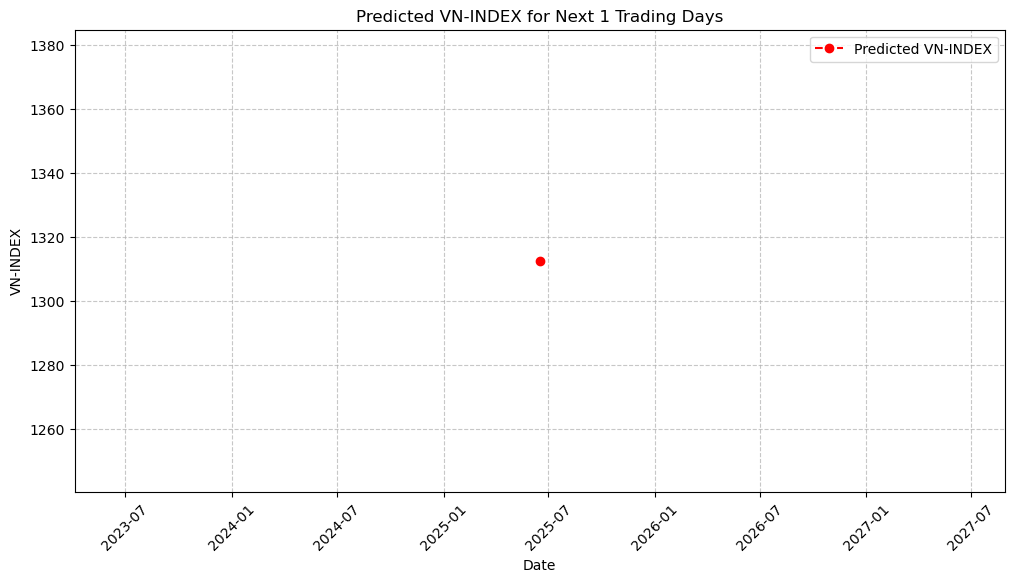

Date
2025-06-13    1315.49
dtype: float64


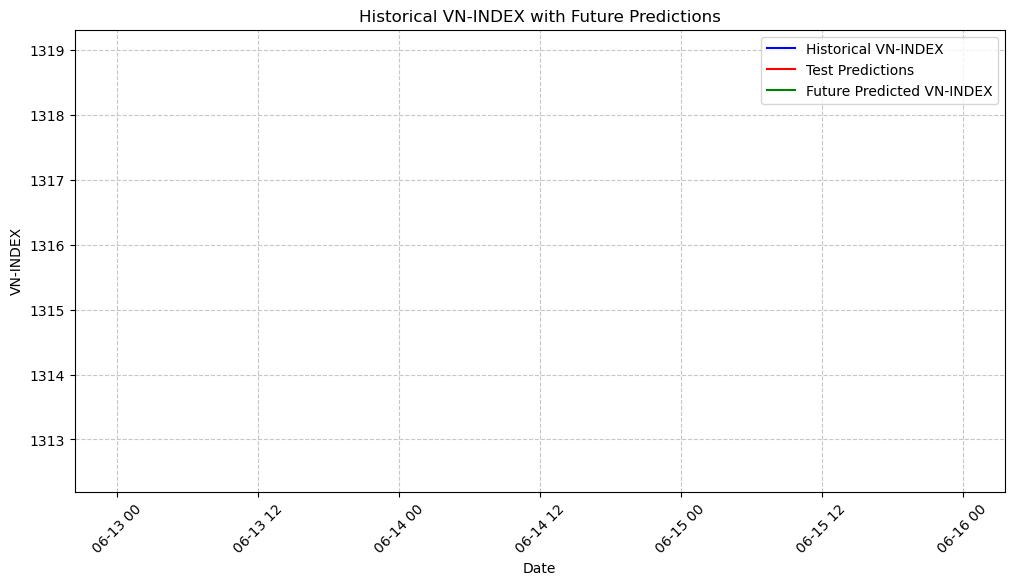

           Date  Predicted VN-INDEX
5693 2025-06-16         1312.519087


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5692    1324.714454
dtype: float64
Hello


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5691    24.472207
dtype: float64
5691    1322.483284
dtype: float64
[DatetimeIndex(['2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-04'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-05'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-06'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-09'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-10'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-11'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-12'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-12 00:00:00
(5687, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.0748 - Val Loss: 0.0001
Test Loss: 0.0004
RMSE: 5.3018, MAE: 5.3018, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


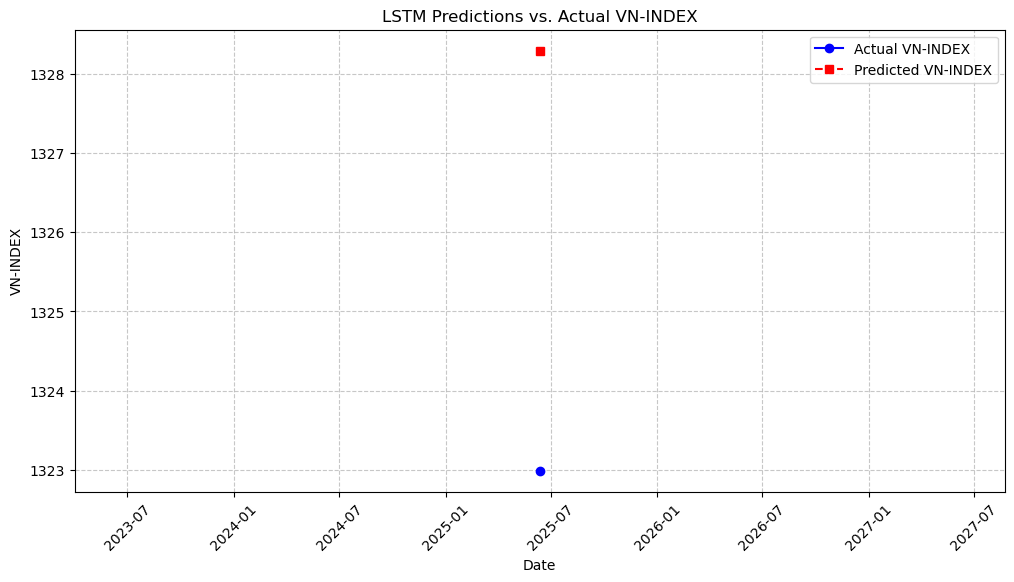

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-12      1322.989998         1328.291823
torch.Size([1, 1, 1])


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5692    1322.869091
dtype: float64
5692    1320.590541
dtype: float64


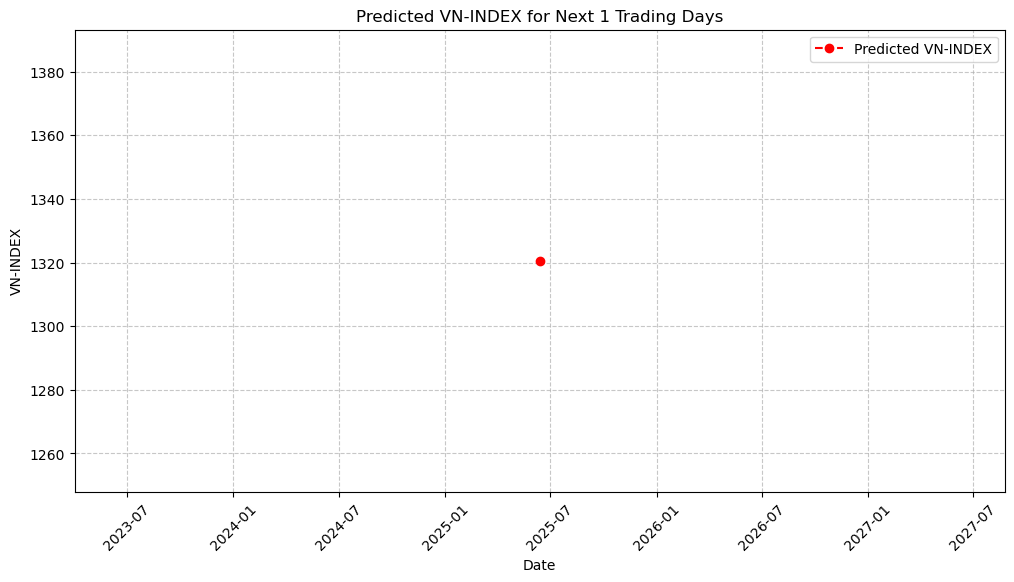

Date
2025-06-12    1322.99
dtype: float64


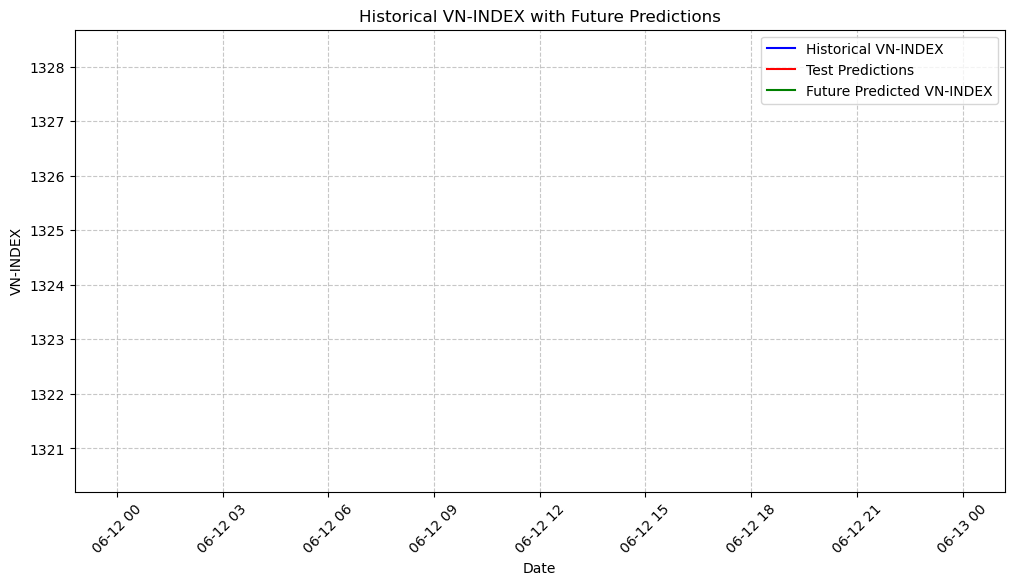

           Date  Predicted VN-INDEX
5692 2025-06-13         1320.590541


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5691    1318.781515
dtype: float64
Hello
5690   -17.690128
dtype: float64
5690    1322.097455
dtype: float64
[DatetimeIndex(['2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-04'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-05'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-06'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-09'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-10'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-11'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-11 00:00:00
(5686, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.0719 - Val Loss: 0.0013
Test Loss: 0.0001
RMSE: 26.7905, MAE: 26.7905, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


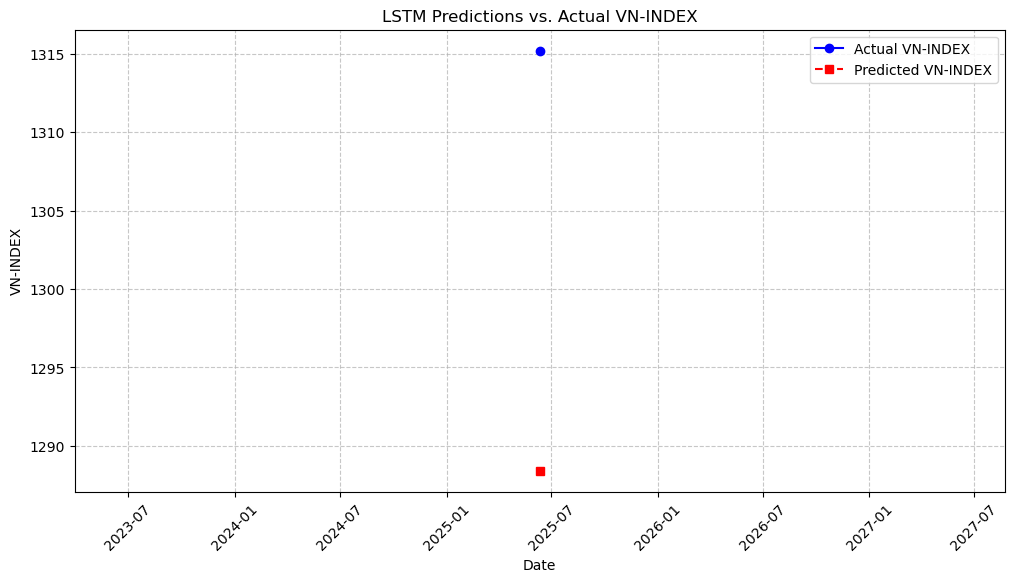

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-11      1315.199998         1288.409531
torch.Size([1, 1, 1])


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5691    1322.483284
dtype: float64
5691    1328.427913
dtype: float64


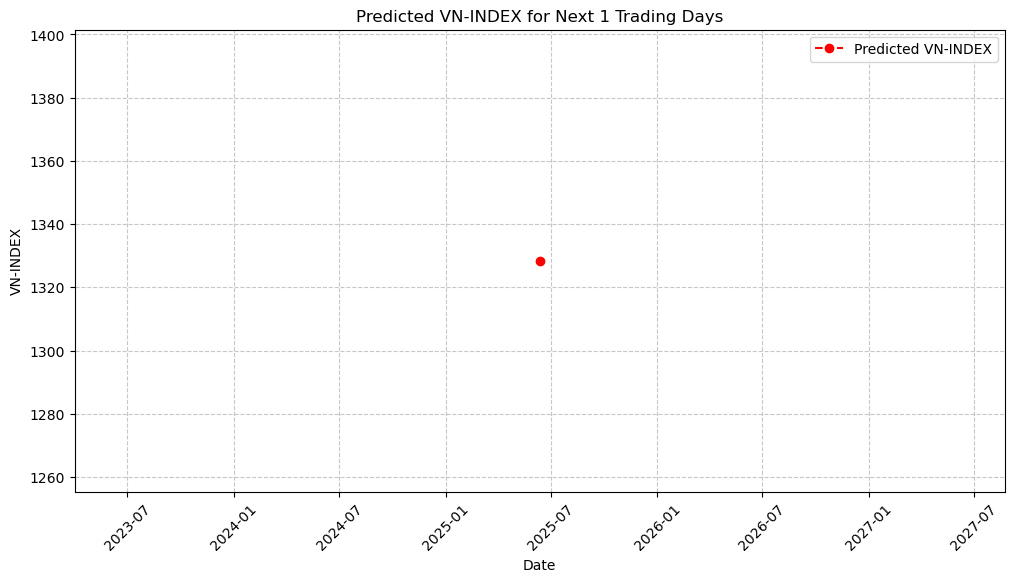

Date
2025-06-11    1315.2
dtype: float64


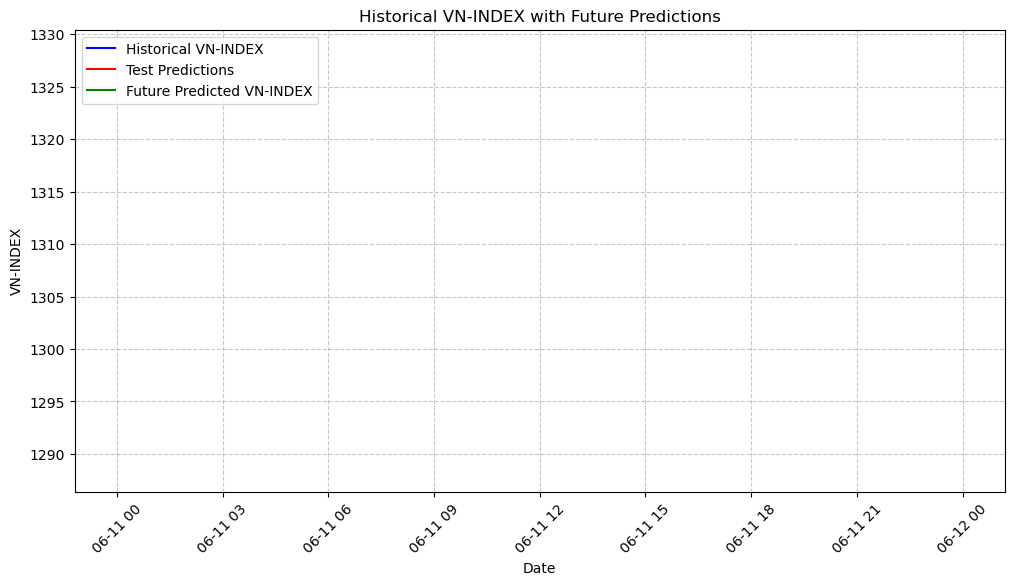

           Date  Predicted VN-INDEX
5691 2025-06-12         1328.427913


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5690    1316.324347
dtype: float64
Hello
5689    8.724041
dtype: float64
5689    1321.711606
dtype: float64
[DatetimeIndex(['2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-04'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-05'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-06'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-09'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-10'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-10 00:00:00
(5685, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.0696 - Val Loss: 0.0006
Test Loss: 0.0001
RMSE: 0.7159, MAE: 0.7159, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


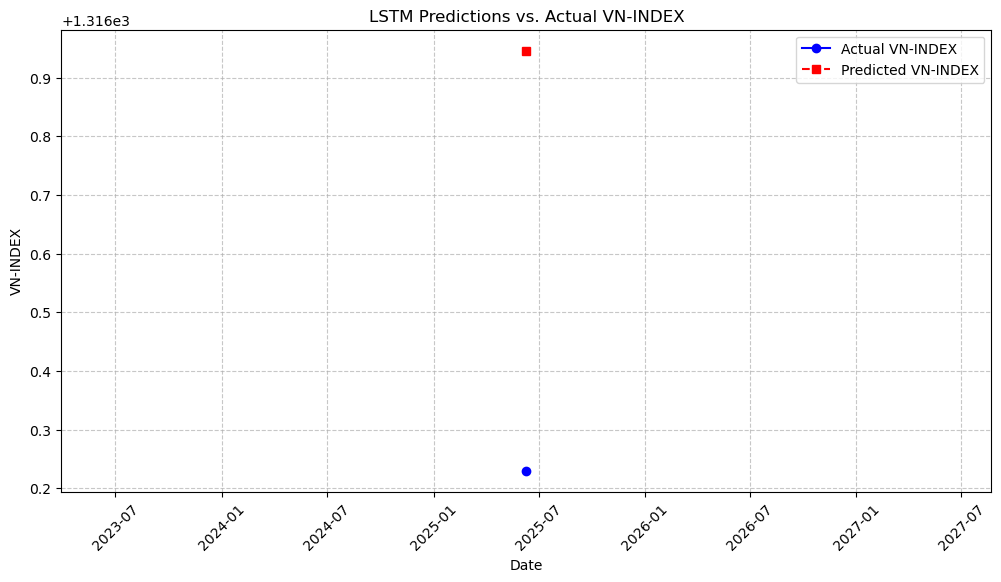

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-10      1316.229999         1316.945922
torch.Size([1, 1, 1])


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5690    1322.097455
dtype: float64
5690    1283.376902
dtype: float64


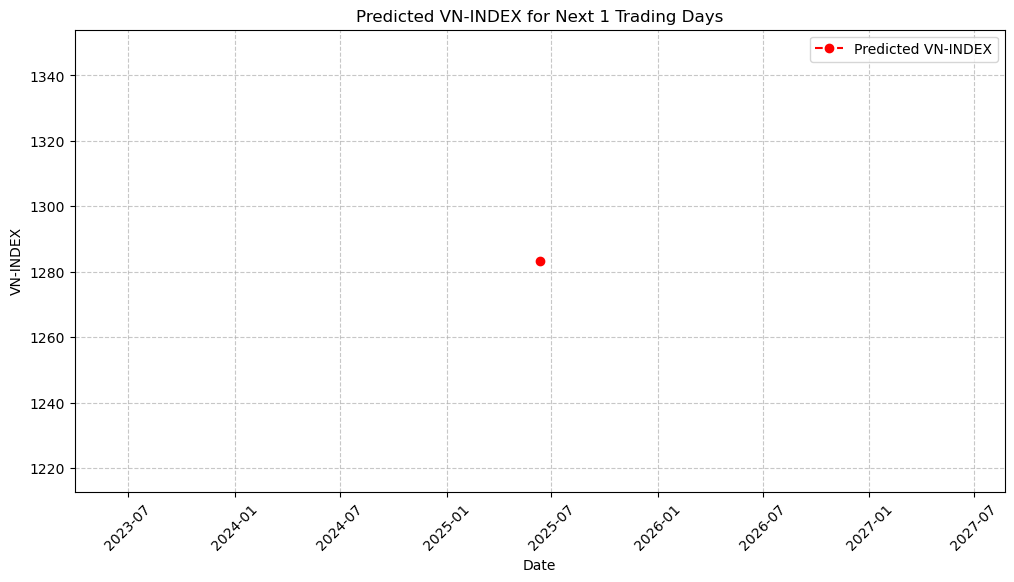

Date
2025-06-10    1316.23
dtype: float64


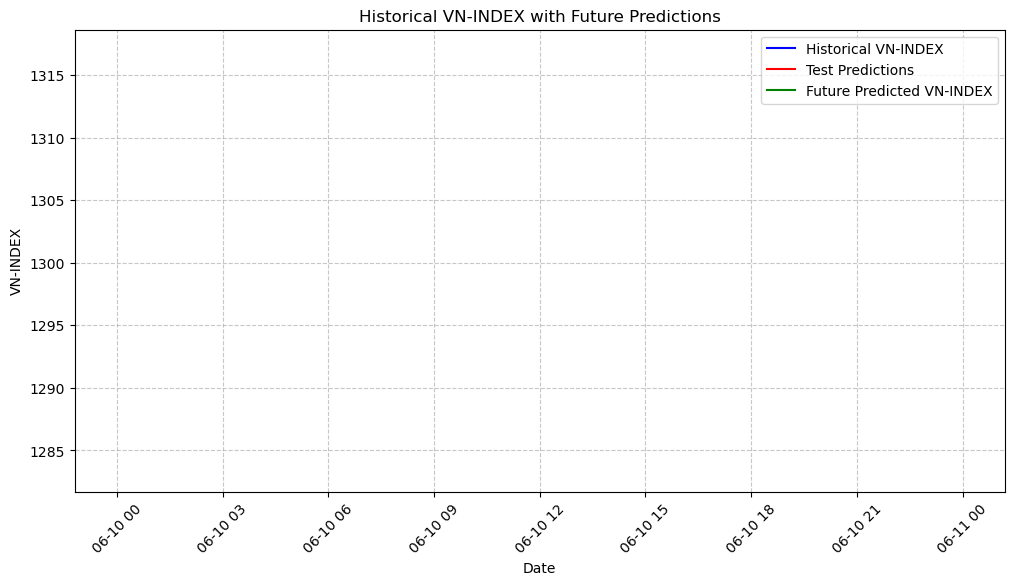

           Date  Predicted VN-INDEX
5690 2025-06-11         1283.376902


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5693    1315.244858
5694    1310.501238
dtype: float64
Hello


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5691    24.472207
5692    23.327248
dtype: float64
5691    1322.483284
5692    1322.869133
dtype: float64
[DatetimeIndex(['2025-05-30', '2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02', '2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03', '2025-06-04'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-04', '2025-06-05'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-05', '2025-06-06'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-06', '2025-06-09'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-09', '2025-06-10'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-10', '2025-06-11'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-11', '2025-06-12'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-12', '2025-06-13'], dtype='datet

/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.5365 - Val Loss: 0.1007
Test Loss: 0.1012
RMSE: 9.1558, MAE: 8.4199, R²: -4.9612, Directional Accuracy: 1.0000


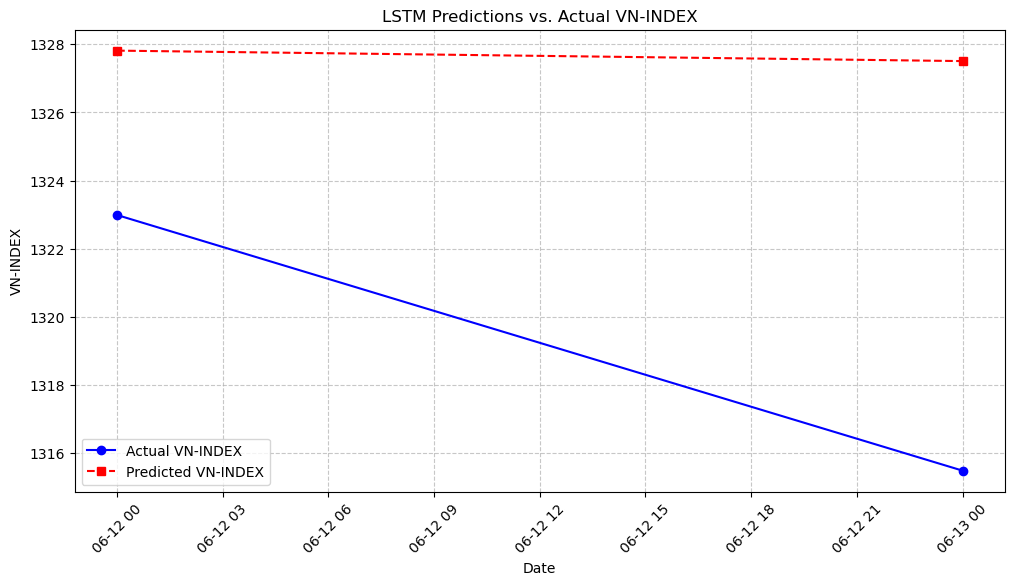

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-12      1322.989998         1327.813475
1 2025-06-13      1315.489999         1327.506350
torch.Size([1, 2, 1])


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5693    1323.254876
5694    1323.640683
dtype: float64
5693    1314.525832
5694    1301.558349
dtype: float64


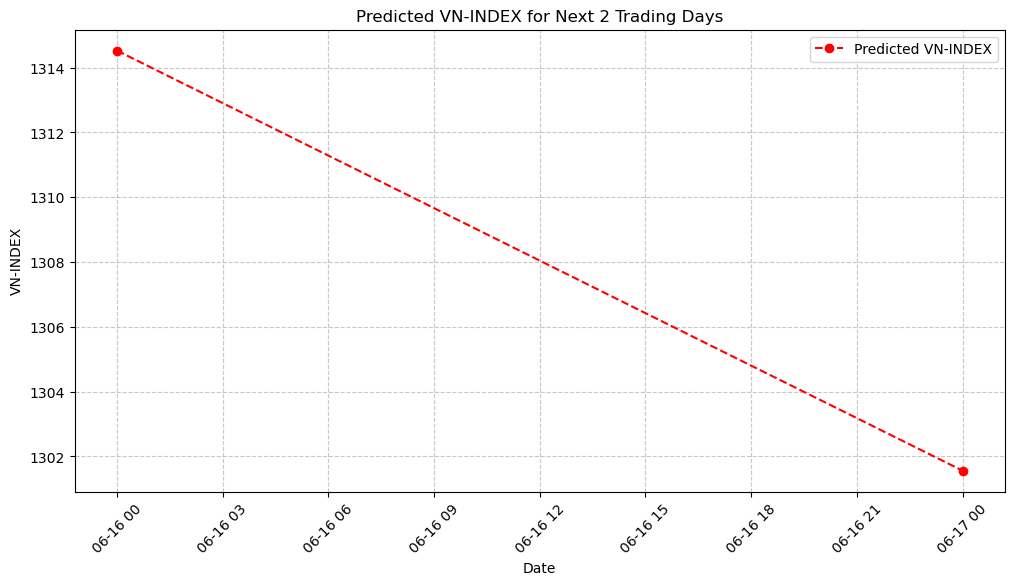

Date
2025-06-12    1322.99
2025-06-13    1315.49
dtype: float64


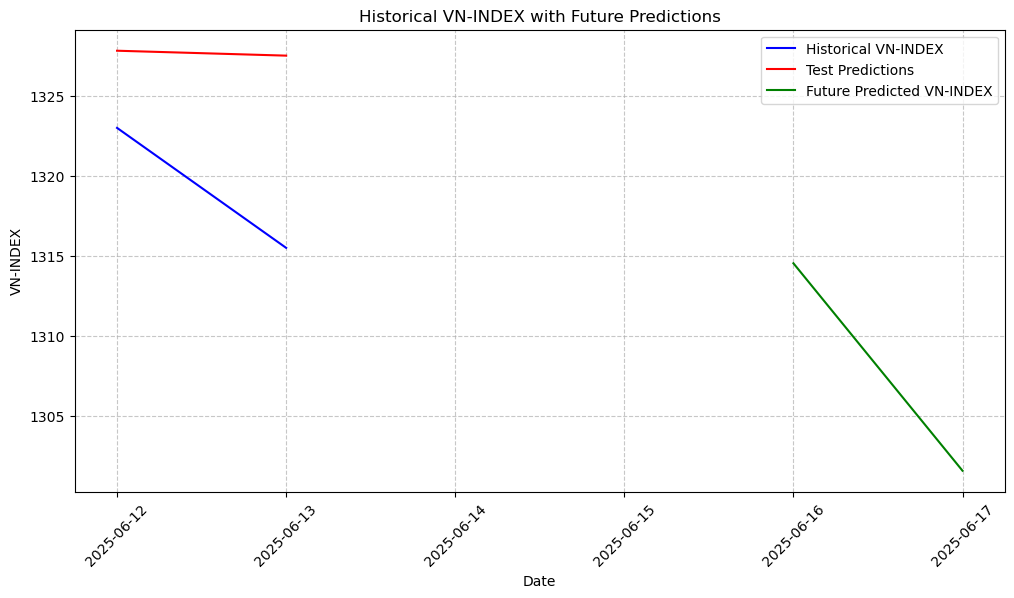

           Date  Predicted VN-INDEX
5693 2025-06-16         1314.525832
5694 2025-06-17         1301.558349


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5691    1318.781515
5692    1320.998595
dtype: float64
Hello
5689     8.724041
5690   -18.651348
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5689    1321.711606
5690    1322.097497
dtype: float64
[DatetimeIndex(['2025-05-28', '2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29', '2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30', '2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02', '2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03', '2025-06-04'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-04', '2025-06-05'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-05', '2025-06-06'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-06', '2025-06-09'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-09', '2025-06-10'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-10', '2025-06-11'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-11 00:

/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.5438 - Val Loss: 0.0048
Test Loss: 0.0009
RMSE: 16.8945, MAE: 13.1453, R²: -1075.1649, Directional Accuracy: 1.0000


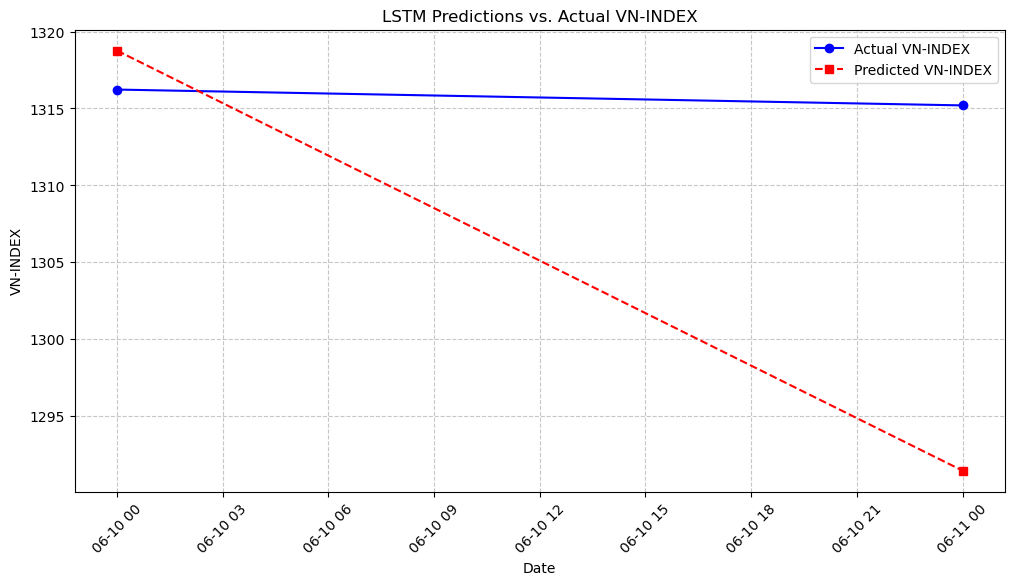

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-10      1316.229999         1318.762862
1 2025-06-11      1315.200000         1291.442166
torch.Size([1, 2, 1])


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5691    1322.483284
5692    1322.869133
dtype: float64
5691    1327.596776
5692    1326.332478
dtype: float64


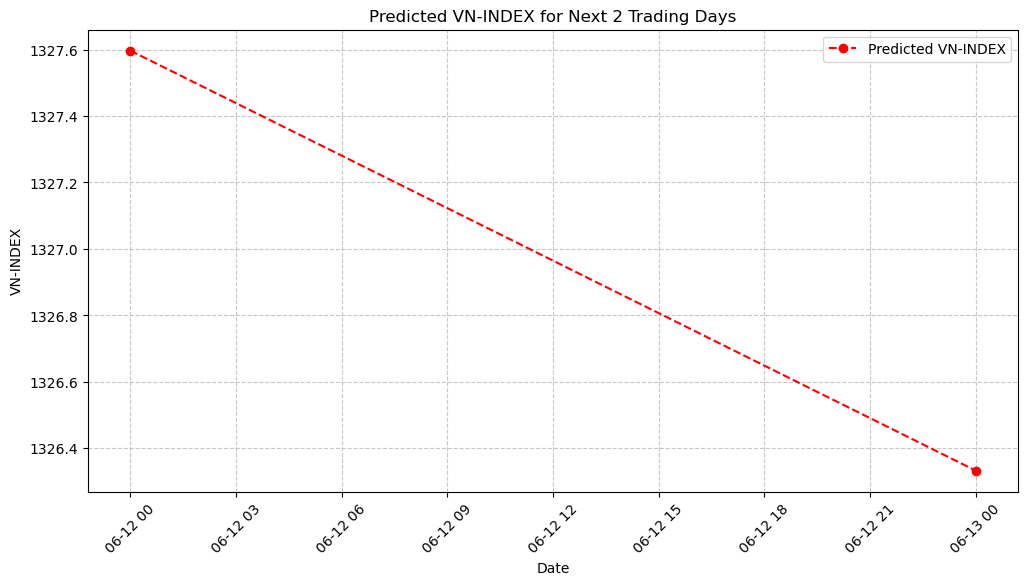

Date
2025-06-10    1316.23
2025-06-11    1315.20
dtype: float64


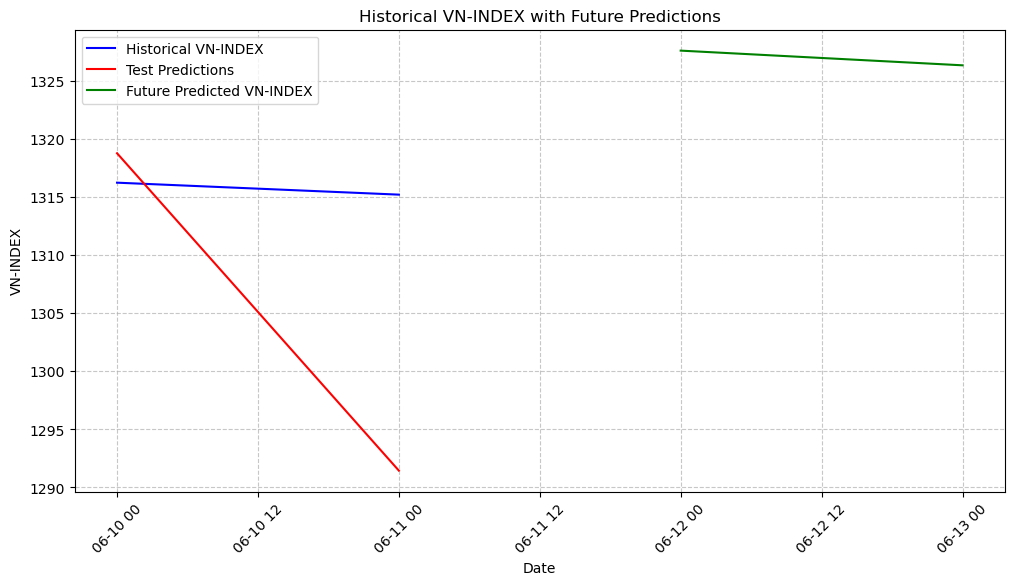

           Date  Predicted VN-INDEX
5691 2025-06-12         1327.596776
5692 2025-06-13         1326.332478


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5689    1310.379675
5690    1311.379117
dtype: float64
Hello


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5687    15.768226
5688    15.451754
dtype: float64
5687    1320.939845
5688    1321.325776
dtype: float64
[DatetimeIndex(['2025-05-26', '2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27', '2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28', '2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29', '2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30', '2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02', '2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03', '2025-06-04'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-04', '2025-06-05'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-05', '2025-06-06'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-06', '2025-06-09'], dtype='datet

/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.5403 - Val Loss: 0.1001
Test Loss: 0.1011
RMSE: 18.3480, MAE: 15.4832, R²: -2.6076, Directional Accuracy: 0.0000


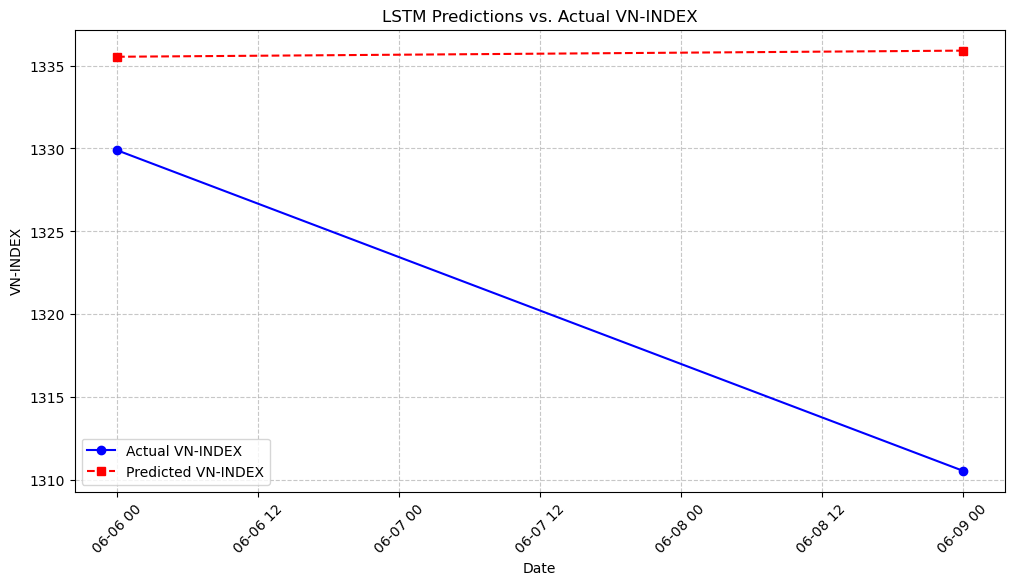

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-06      1329.890000         1335.528534
1 2025-06-09      1310.569999         1335.897964
torch.Size([1, 2, 1])


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5689    1321.711606
5690    1322.097497
dtype: float64
5689    1321.220208
5690    1294.472831
dtype: float64


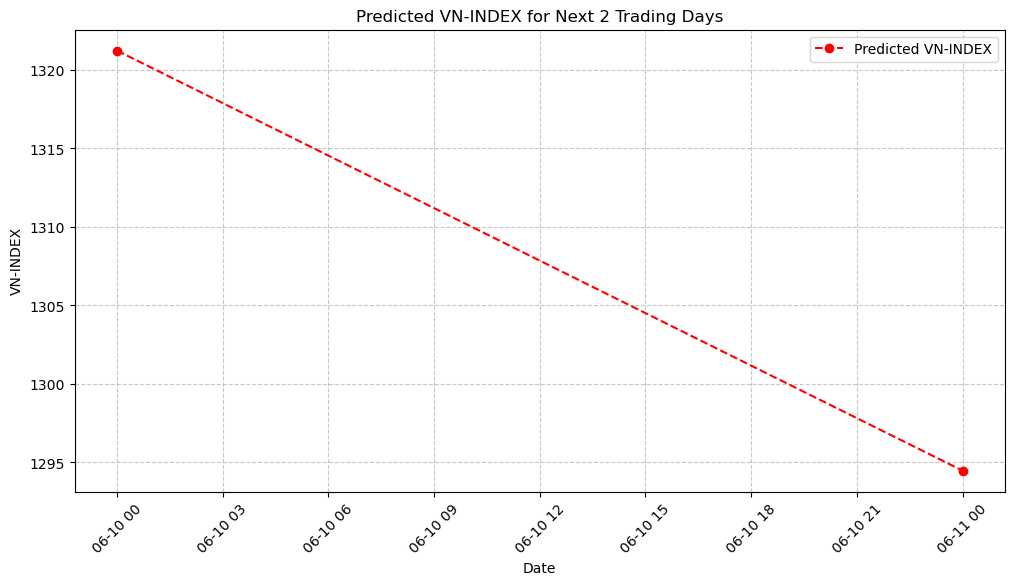

Date
2025-06-06    1329.89
2025-06-09    1310.57
dtype: float64


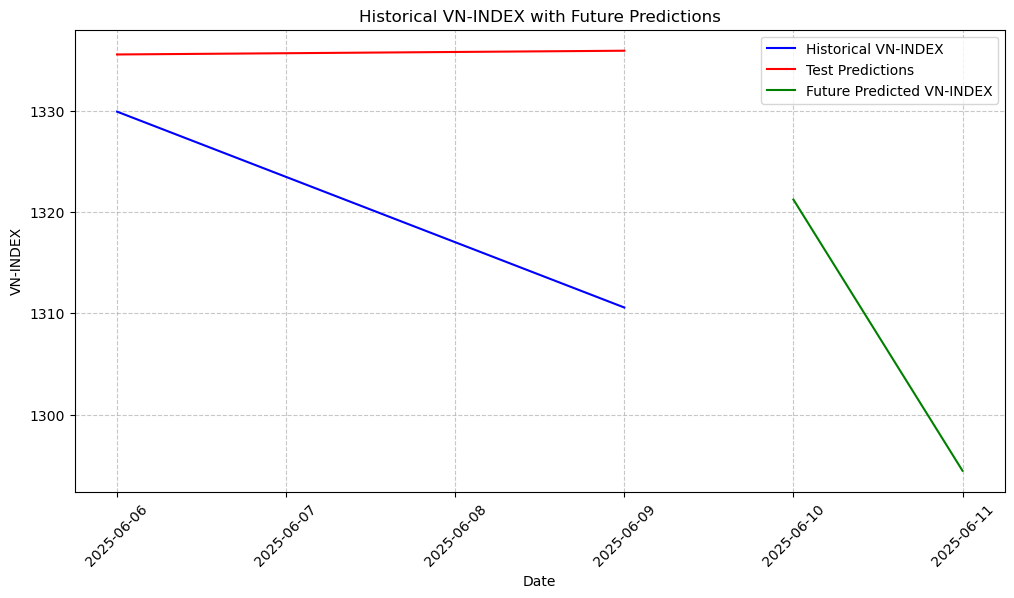

           Date  Predicted VN-INDEX
5689 2025-06-10         1321.220208
5690 2025-06-11         1294.472831


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5687    1340.736389
5688    1341.410514
dtype: float64
Hello


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5685    26.088179
5686    14.492888
dtype: float64
5685    1320.168003
5686    1320.553973
dtype: float64
[DatetimeIndex(['2025-05-22', '2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23', '2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26', '2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27', '2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28', '2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29', '2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30', '2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02', '2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03', '2025-06-04'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-04', '2025-06-05'], dtype='datet

/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.5394 - Val Loss: 0.0006
Test Loss: 0.0003
RMSE: 8.4030, MAE: 7.5167, R²: -20.2005, Directional Accuracy: 1.0000


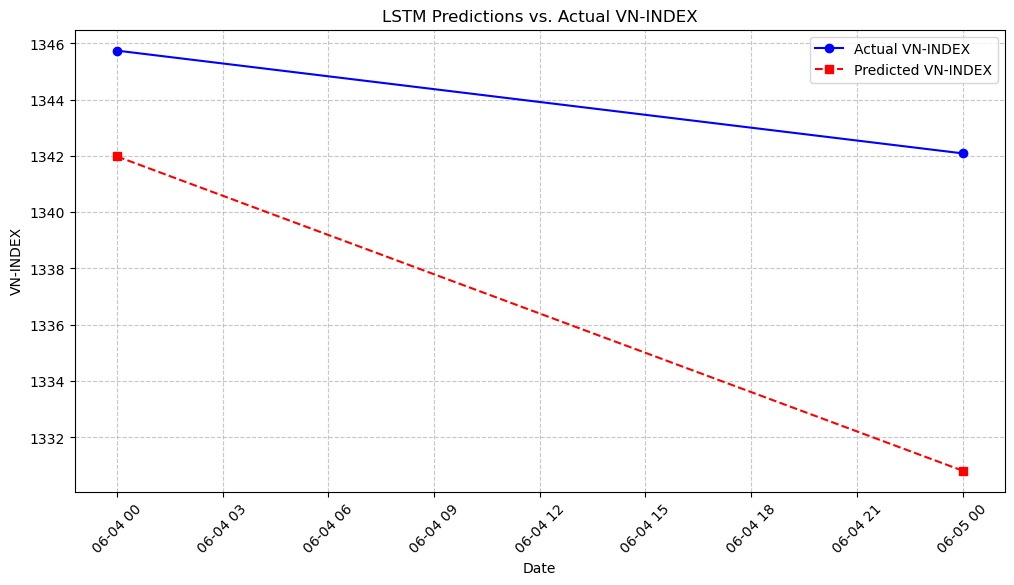

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-04      1345.740000         1341.979596
1 2025-06-05      1342.090002         1330.816974
torch.Size([1, 2, 1])


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


5687    1320.939845
5688    1321.325776
dtype: float64
5687    1333.687361
5688    1333.740905
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

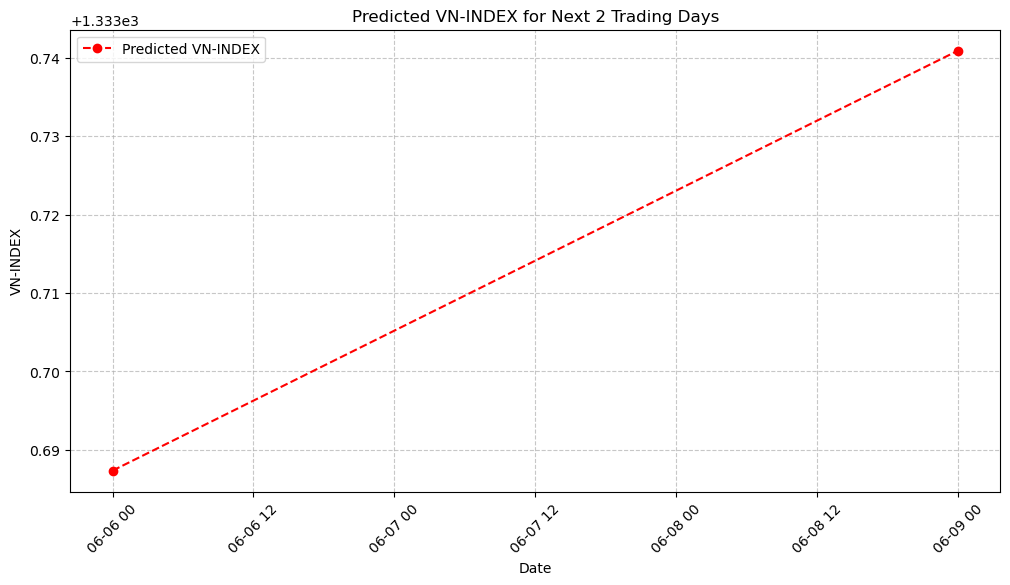

Date
2025-06-04    1345.74
2025-06-05    1342.09
dtype: float64


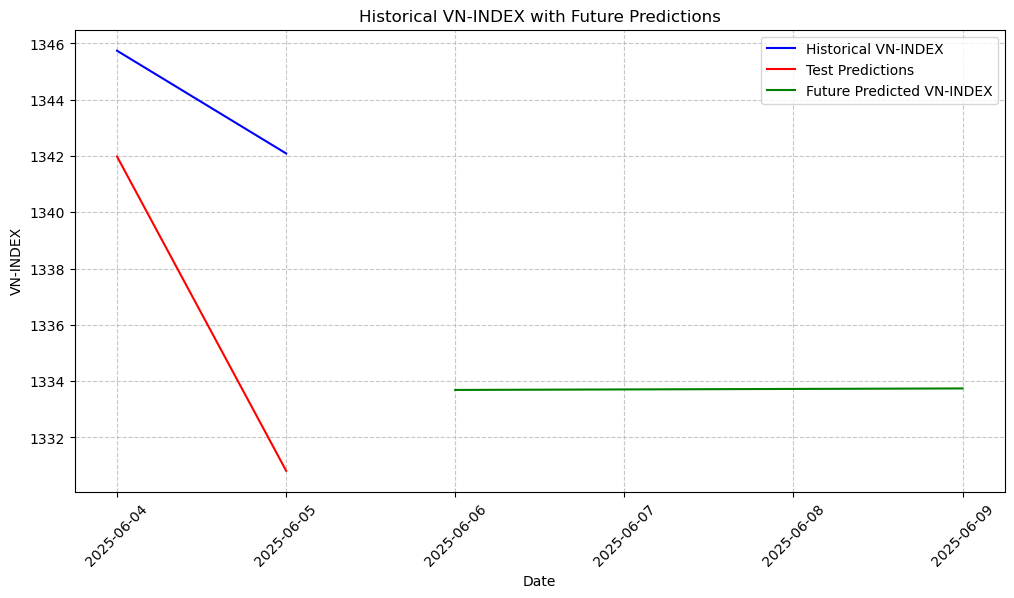

           Date  Predicted VN-INDEX
5687 2025-06-06         1333.687361
5688 2025-06-09         1333.740905


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5685    1347.709695
5686    1349.560712
dtype: float64
Hello
5683    14.222632
5684    20.326207
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


5683    1319.396081
5684    1319.782090
dtype: float64
[DatetimeIndex(['2025-05-20', '2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21', '2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22', '2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23', '2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26', '2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27', '2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28', '2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29', '2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30', '2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02', '2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-03 00:

/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.5384 - Val Loss: 0.0048
Test Loss: 0.1001
RMSE: 6.8123, MAE: 6.3423, R²: -0.5482, Directional Accuracy: 1.0000


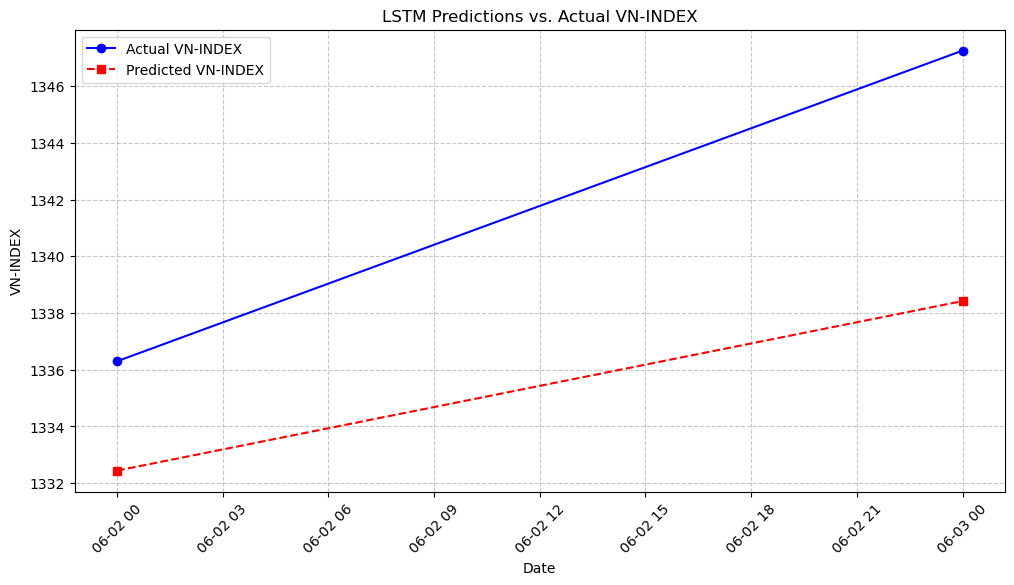

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-02      1336.300001         1332.444183
1 2025-06-03      1347.250000         1338.421243
torch.Size([1, 2, 1])


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


5685    1320.168003
5686    1320.553973
dtype: float64
5685    1343.844405
5686    1332.856096
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

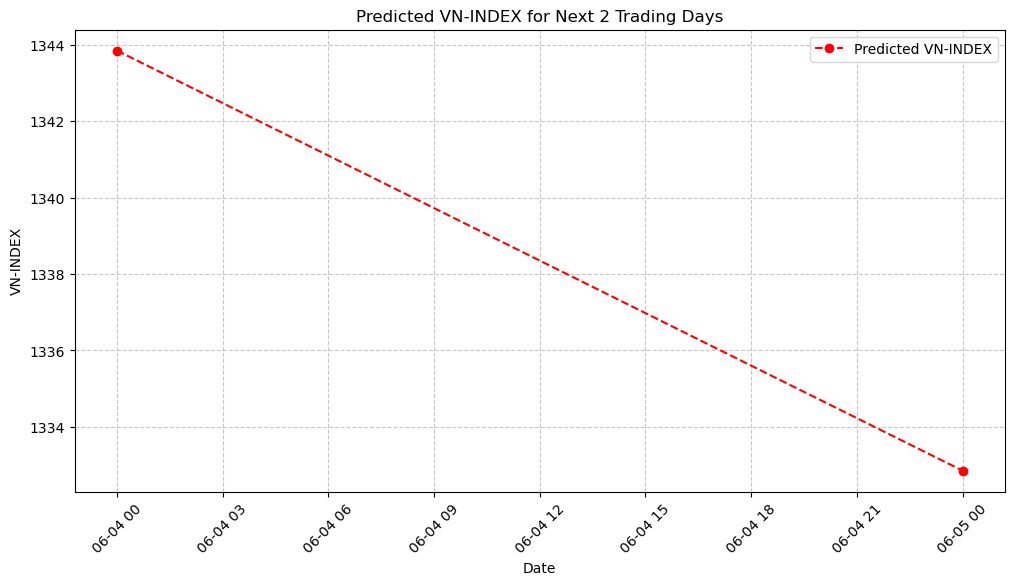

Date
2025-06-02    1336.30
2025-06-03    1347.25
dtype: float64


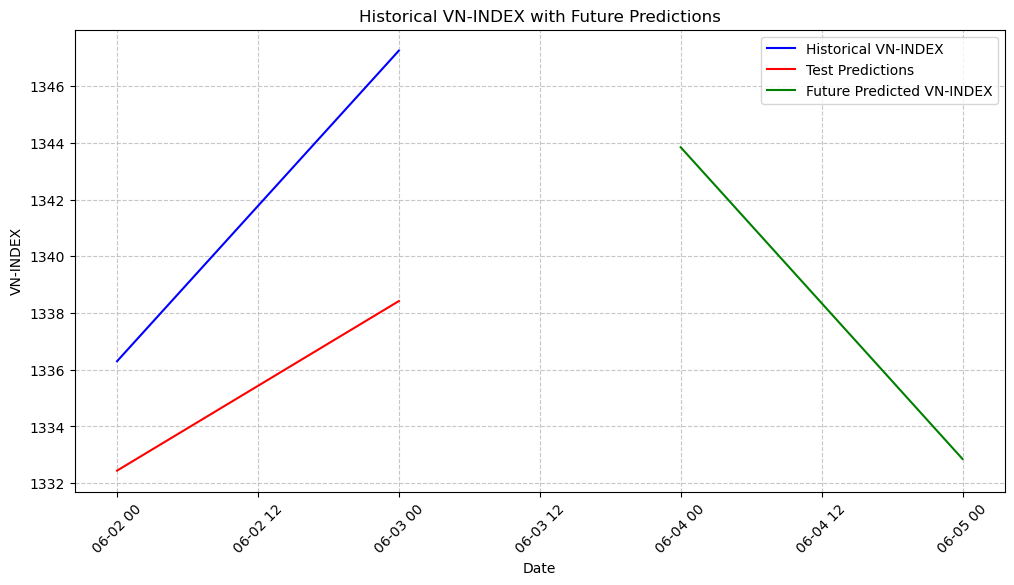

           Date  Predicted VN-INDEX
5685 2025-06-04         1343.844405
5686 2025-06-05         1332.856096


In [6]:
for n_forecast in range(1,3):
    for i in range(5):
        baseline = ExponentialSmoothing(
        df_1['VN_Index_Close'].iloc[:-n_forecast*(i+1)],
        trend='add',            # additive trend
        seasonal='add',         # additive seasonality
        seasonal_periods=seasonal_periods
        ).fit()

        # 2) Forecast the next day (one‐step ahead):
        price_forecast = baseline.forecast(n_forecast)

        # 3) If you want to extract the trend/seasonal forecasts separately:
        fitted_components = baseline.fittedvalues  # this is price = level+trend+seasonal
        level = baseline.level                     # the “smoothed level” ≈ trend
        seasonal = baseline.season                 # the seasonal factors

        print(price_forecast)

        data = df_1[['residual', 'trend', 'seasonal', 'dow_sin', 'dow_cos', 'month_sin', 'month_cos']].iloc[:-n_forecast]

        if i:
            data = data.iloc[:-n_forecast*i]
        # 🚀 Train the model and get the test set
        model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion, tuning=False, train_seq_len=n_lags, test_seq_len=n_forecast, seasonal_periods=seasonal_periods, epochs=50)
        future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=n_forecast, seasonal_periods=seasonal_periods)

Hello


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


5693    19.241020
5694     4.727196
dtype: float64
5693    1323.254876
5694    1323.640683
dtype: float64
[DatetimeIndex(['2025-06-03', '2025-06-04'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-04', '2025-06-05'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-05', '2025-06-06'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-06', '2025-06-09'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-09', '2025-06-10'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-10', '2025-06-11'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-11', '2025-06-12'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-12', '2025-06-13'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-13', '2025-06-16'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-16', '2025-06-17'], dtype='datet

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

Final: Training Loss: 0.5270 - Val Loss: 0.0004
Test Loss: 0.0021
RMSE: 34.4679, MAE: 32.6733, R²: -50.7797, Directional Accuracy: 0.0000


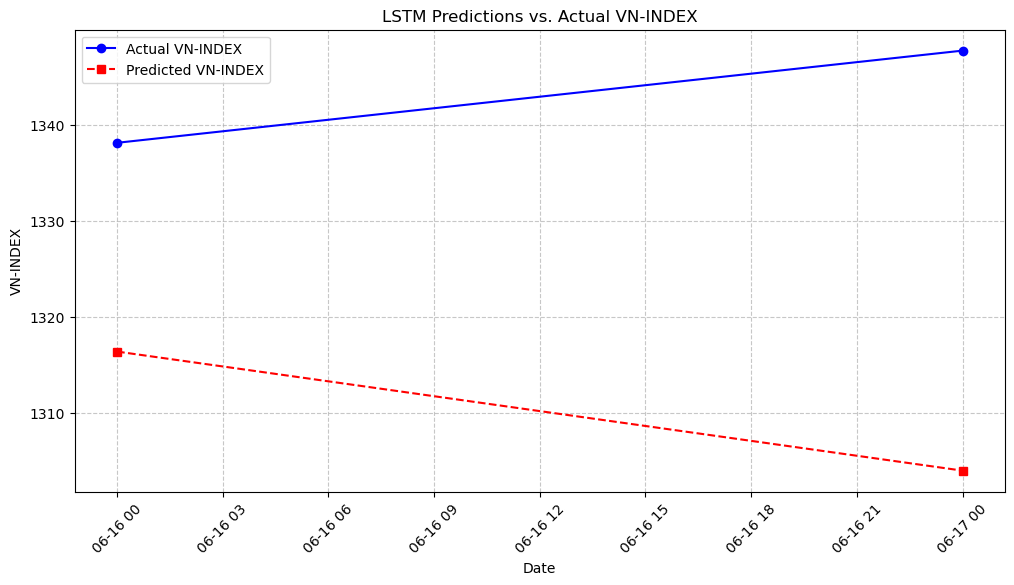

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-16      1338.110001         1316.413869
1 2025-06-17      1347.690002         1304.039617
torch.Size([1, 2, 1])


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


5695    1324.026384
5696    1324.412148
dtype: float64
5695    1334.637025
5696    1353.398716
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

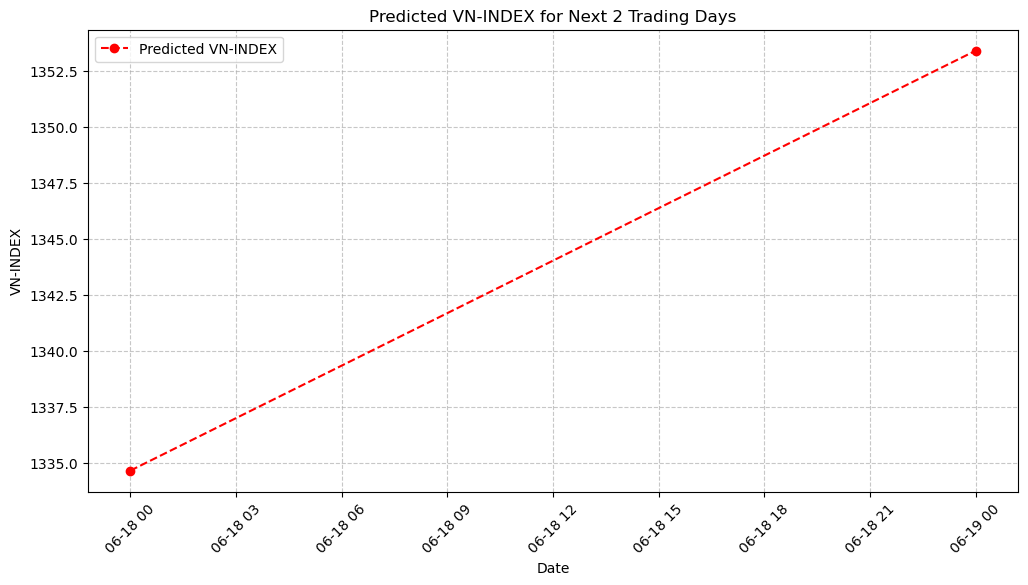

Date
2025-06-16    1338.11
2025-06-17    1347.69
dtype: float64


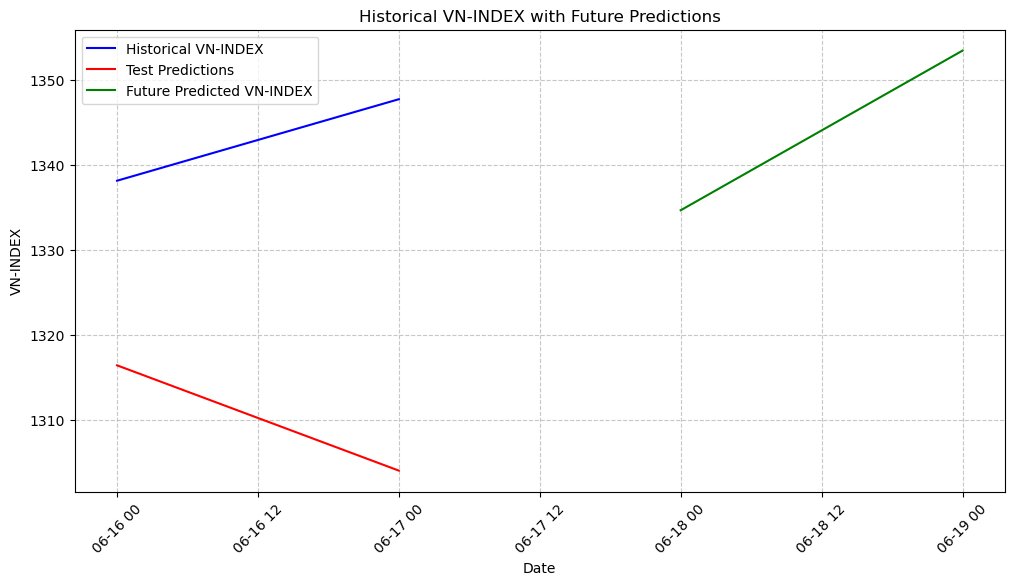

           Date  Predicted VN-INDEX
5695 2025-06-18         1334.637025
5696 2025-06-19         1353.398716


In [7]:
data = df_1[['residual', 'trend', 'seasonal', 'dow_sin', 'dow_cos', 'month_sin', 'month_cos']]
# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion, tuning=False, train_seq_len=n_lags, test_seq_len=n_forecast, 
                                                   seasonal_periods=seasonal_periods, epochs=50, 
                                                   params={'hidden_size': 64, 'num_layers': 2, 'dropout': 0.4304905019702554, 'learning_rate': 0.0022837602160213867, 'batch_size': 128})

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=n_forecast, seasonal_periods=seasonal_periods)